In [ ]:
import json

import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr


def load_json_file(path: str) -> dict:
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


def plot_variable(ax, hyras_path, nukleus_path, var_name):
    ax.set_title(f"Germany {var_name}")
    with xr.open_dataset(hyras_path) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name]),
            linestyle="solid",
            color="red",
        )
    with xr.open_dataset(nukleus_path) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name] - 273.15),
            linestyle="solid",
            color="black",
        )
    ax.set_ylabel("Temperature [°C]")


base_path = "/work/bb1364/g260190_heinrich/UDAG/Data/json_files"

files = {
    "NUKLEUS": {
        "tas": load_json_file(f"{base_path}/NUKLEUS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmax_info.json"),
    },
    "HYRAS": {
        "tas": load_json_file(f"{base_path}/HYRAS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/HYRAS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/HYRAS_Germany_tasmax_info.json"),
    },
}

for freq in ["yearly", "mon"]:
    fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True, sharey=True)

    plot_variable(
        axes[0],
        files["HYRAS"]["tas"][freq],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        "tas",
    )

    plot_variable(
        axes[1],
        files["HYRAS"]["tasmin"][freq],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        "tasmin",
    )

    plot_variable(
        axes[2],
        files["HYRAS"]["tasmax"][freq],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        "tasmax",
    )

    scenario_color = {
        "NUKLEUS CCLM Hereon": "black",
        "HYRAS": "red",
    }
    handles = [
        mlines.Line2D([], [], color=scenario_color[s], linestyle="solid", label=s)
        for s in scenario_color
    ]

    legend = fig.legend(
        handles=handles,
        loc="lower center",
        bbox_to_anchor=(0.4, -0.00),
        ncol=len(handles),
        title="Data",
    )
    fig.add_artist(legend)
    plt.savefig(
        f"HYRAS_{freq}.png",
        bbox_inches="tight",
        format="png",
        dpi=300,
    )
    plt.show()


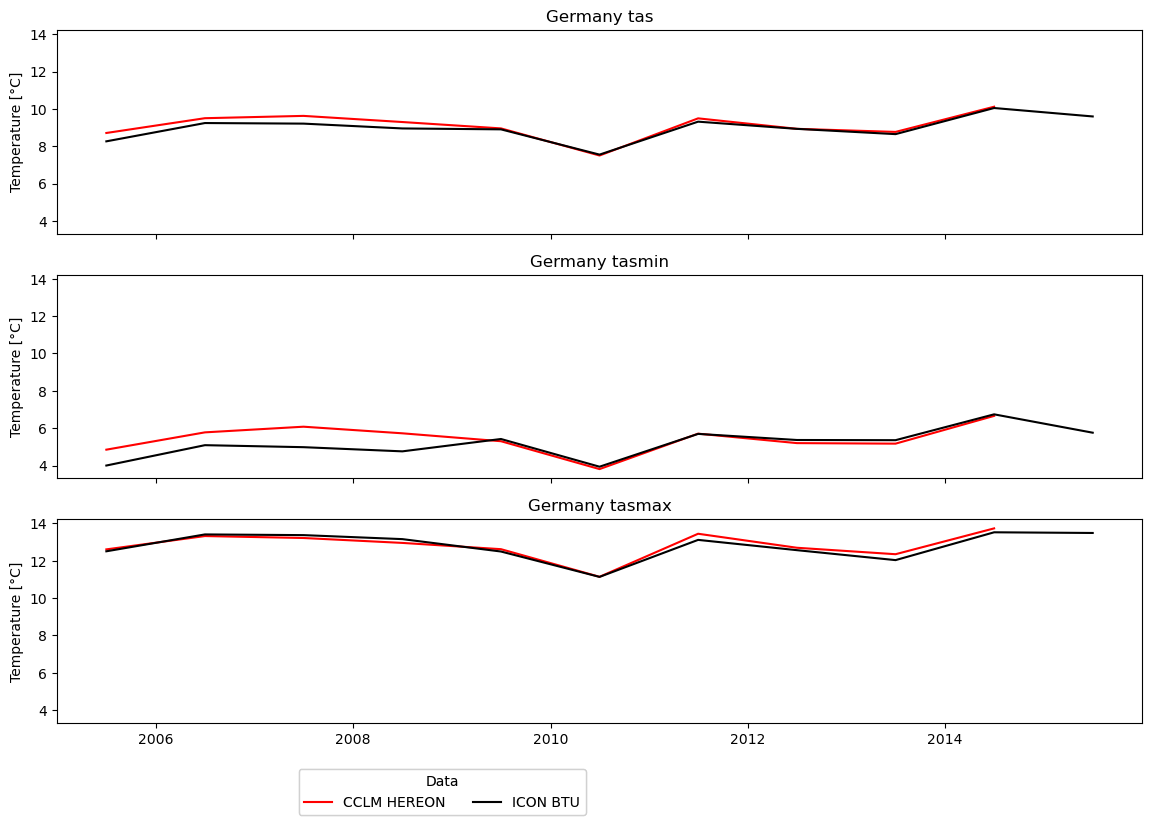

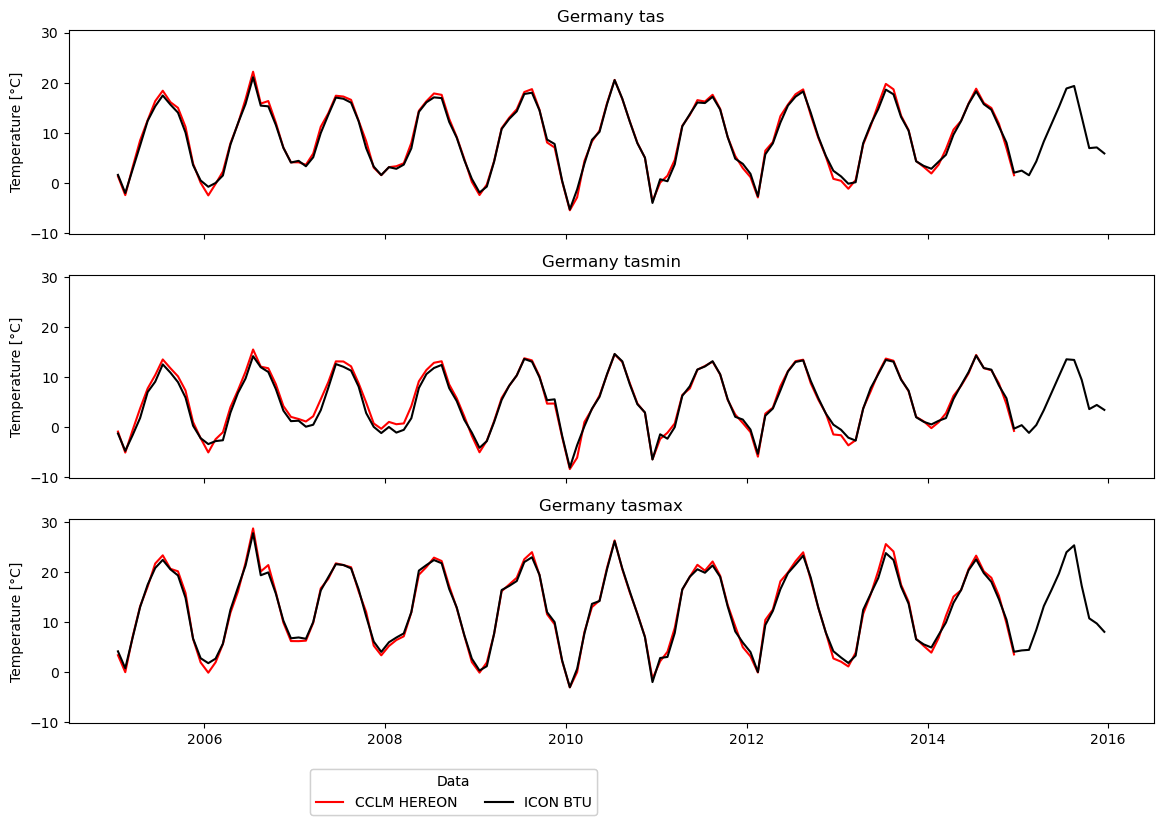

In [5]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt


def load_json_file(path: str) -> dict:
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


def plot_variable(ax, hyras_path, nukleus_path, var_name):
    ax.set_title(f"Germany {var_name}")
    with xr.open_dataset(hyras_path) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name] - 273.15),
            linestyle="solid",
            color="red",
        )
    with xr.open_dataset(nukleus_path) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name] - 273.15),
            linestyle="solid",
            color="black",
        )
    ax.set_ylabel("Temperature [°C]")


base_path = "/work/bb1364/g260190_heinrich/UDAG/Data/json_files"

files = {
    "NUKLEUS": {
        "tas": load_json_file(f"{base_path}/NUKLEUS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmax_info.json"),
    },
    "HYRAS": {
        "tas": load_json_file(f"{base_path}/HYRAS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/HYRAS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/HYRAS_Germany_tasmax_info.json"),
    },
}

for freq in ["yearly", "mon"]:
    fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True, sharey=True)

    plot_variable(
        axes[0],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        "tas",
    )

    plot_variable(
        axes[1],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        "tasmin",
    )

    plot_variable(
        axes[2],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        "tasmax",
    )

    scenario_color = {"CCLM HEREON": "red", "ICON BTU": "black"}
    handles = [
        mlines.Line2D([], [], color=scenario_color[s], linestyle="solid", label=s)
        for s in scenario_color
    ]

    legend = fig.legend(
        handles=handles,
        loc="lower center",
        bbox_to_anchor=(0.4, -0.00),
        ncol=len(handles),
        title="Data",
    )
    fig.add_artist(legend)
    plt.savefig(
        f"double_nukleus_{freq}.png",
        bbox_inches="tight",
        format="png",
        dpi=300,
    )
    plt.show()


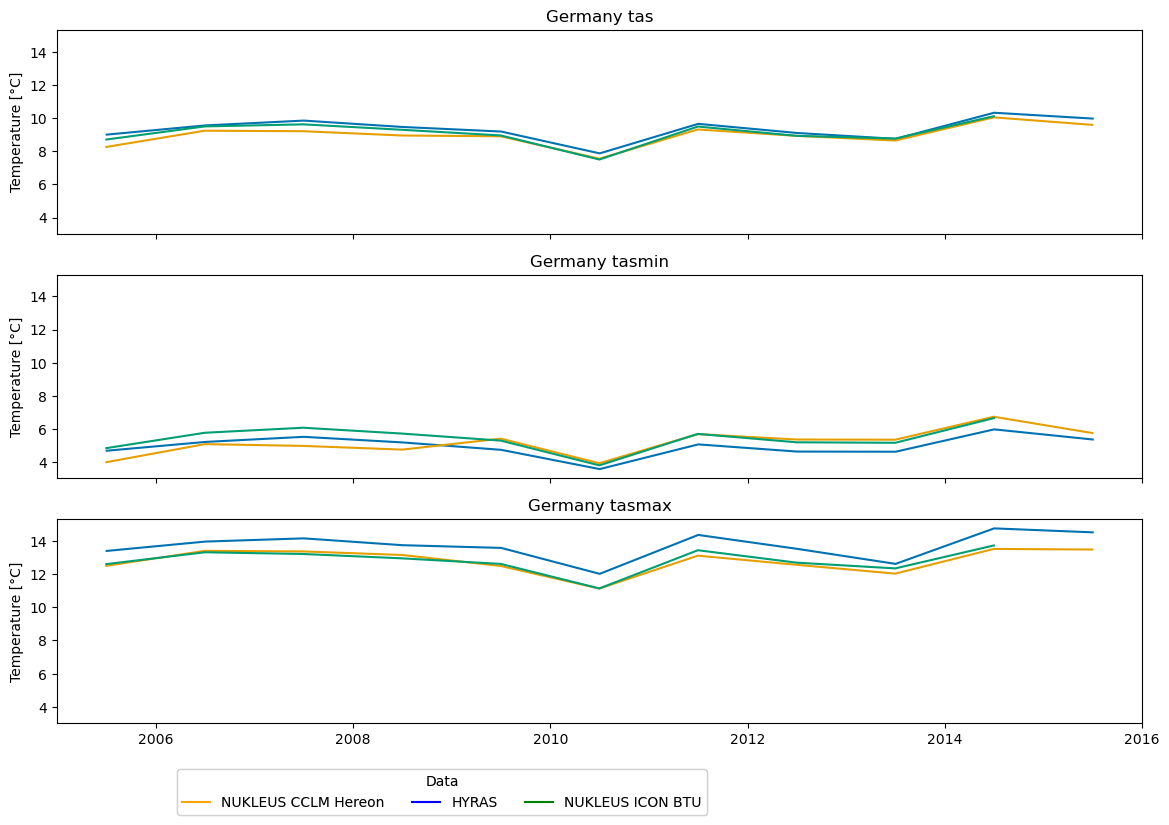

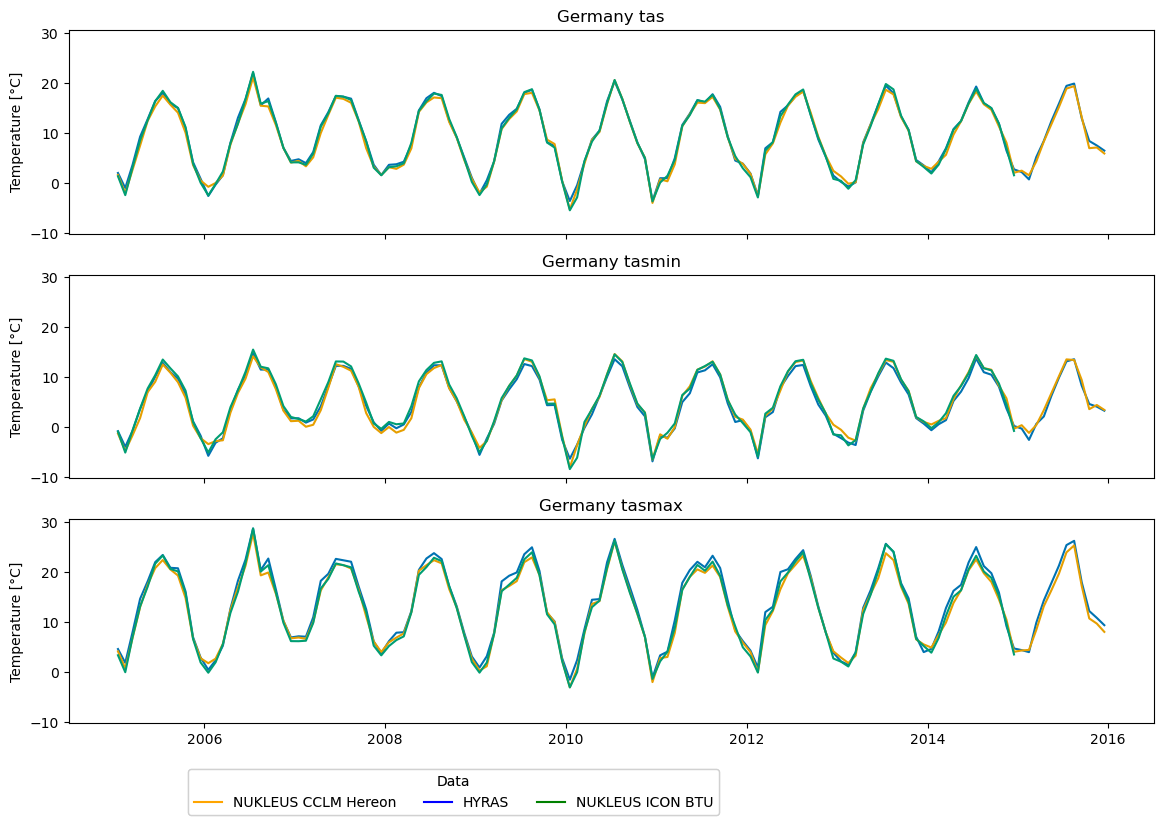

In [ ]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt


def load_json_file(path: str) -> dict:
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


def plot_variable(ax, hyras_path, nukleus_hereon, nukleus_btu, var_name):
    TOL_COLORS = {
        "blue": "#0072B2",
        "orange": "#E69F00",
        "green": "#009E73",
    }

    ax.set_title(f"Germany {var_name}")
    with xr.open_dataset(hyras_path) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name]),
            linestyle="solid",
            color=TOL_COLORS["blue"],
        )
    with xr.open_dataset(nukleus_hereon) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name] - 273.15),
            linestyle="solid",
            color=TOL_COLORS["orange"],
        )
    with xr.open_dataset(nukleus_btu) as df:
        ax.plot(
            np.squeeze(df["time"]),
            np.squeeze(df[var_name] - 273.15),
            linestyle="solid",
            color=TOL_COLORS["green"],
        )
    ax.set_ylabel("Temperature [°C]")


base_path = "/work/bb1364/g260190_heinrich/UDAG/Data/json_files"

files = {
    "NUKLEUS": {
        "tas": load_json_file(f"{base_path}/NUKLEUS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmax_info.json"),
    },
    "HYRAS": {
        "tas": load_json_file(f"{base_path}/HYRAS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/HYRAS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/HYRAS_Germany_tasmax_info.json"),
    },
}

for freq in ["yearly", "mon"]:
    fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True, sharey=True)

    plot_variable(
        axes[0],
        files["HYRAS"]["tas"][freq],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        "tas",
    )

    plot_variable(
        axes[1],
        files["HYRAS"]["tasmin"][freq],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        "tasmin",
    )

    plot_variable(
        axes[2],
        files["HYRAS"]["tasmax"][freq],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        "tasmax",
    )

    scenario_color = {
        "NUKLEUS CCLM Hereon": "orange",
        "HYRAS": "blue",
        "NUKLEUS ICON BTU": "green",
    }
    handles = [
        mlines.Line2D([], [], color=scenario_color[s], linestyle="solid", label=s)
        for s in scenario_color
    ]

    legend = fig.legend(
        handles=handles,
        loc="lower center",
        bbox_to_anchor=(0.4, -0.00),
        ncol=len(handles),
        title="Data",
    )
    fig.add_artist(legend)
    plt.savefig(
        f"HYRAS_{freq}.png",
        bbox_inches="tight",
        format="png",
        dpi=300,
    )
    plt.show()


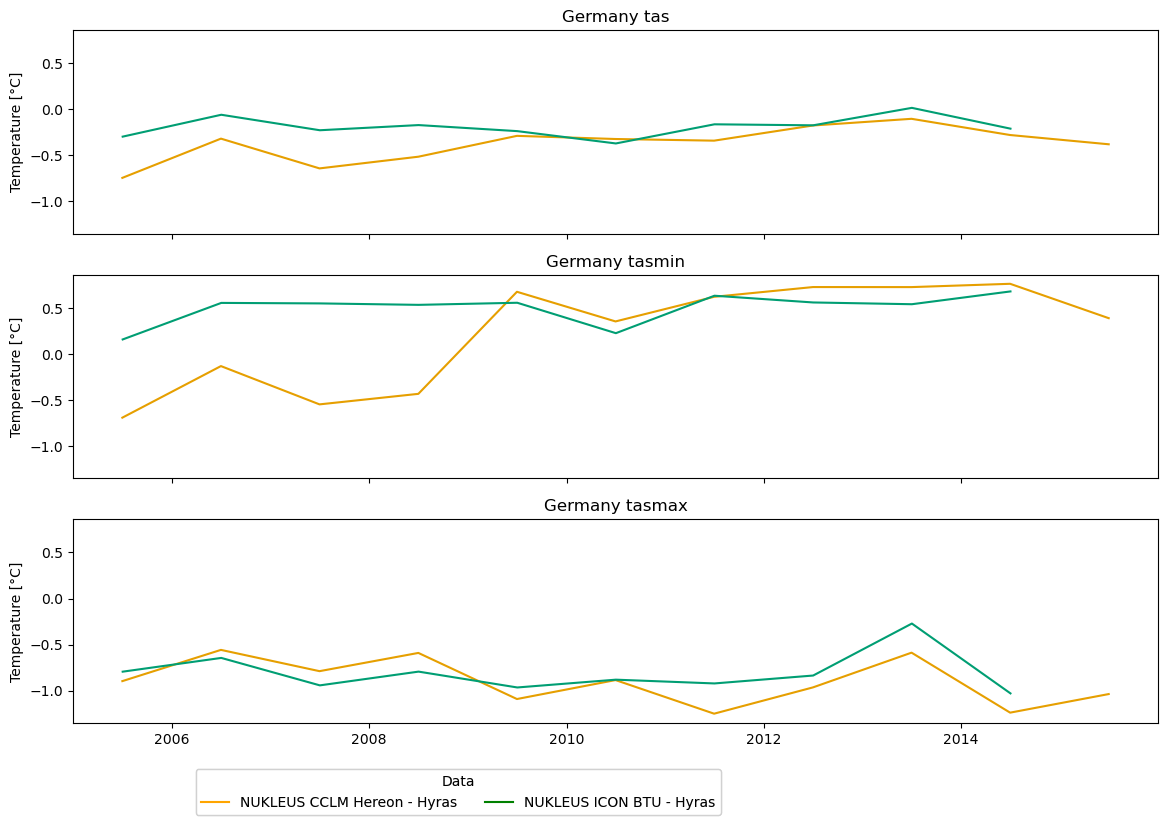

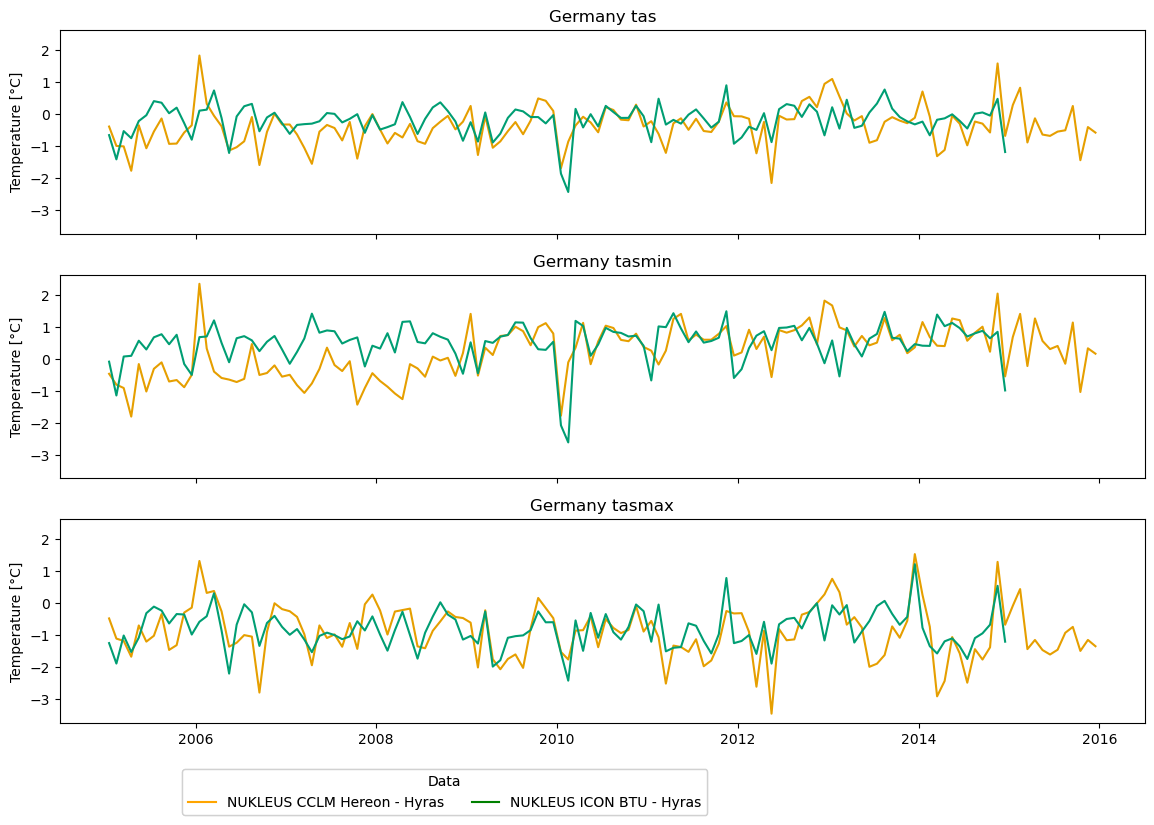

In [20]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt


def load_json_file(path: str) -> dict:
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)


def plot_variable(ax, hyras_path, nukleus_hereon, nukleus_btu, var_name):
    TOL_COLORS = {
        "blue": "#0072B2",
        "orange": "#E69F00",
        "green": "#009E73",
    }

    ax.set_title(f"Germany {var_name}")
    with xr.open_dataset(hyras_path) as dx:
        with xr.open_dataset(nukleus_hereon) as df:
            ax.plot(
                np.squeeze(df["time"]),
                np.squeeze(df[var_name].values - 273.15)
                - np.squeeze(dx[var_name].values),
                linestyle="solid",
                color=TOL_COLORS["orange"],
            )
        with xr.open_dataset(nukleus_btu) as df:
            ax.plot(
                np.squeeze(dx["time"][0 : len(np.squeeze(df[var_name].values))]),
                np.squeeze(df[var_name].values - 273.15)
                - np.squeeze(
                    dx[var_name].values[0 : len(np.squeeze(df[var_name].values))]
                ),
                linestyle="solid",
                color=TOL_COLORS["green"],
            )
    ax.set_ylabel("Temperature [°C]")


base_path = "/work/bb1364/g260190_heinrich/UDAG/Data/json_files"

files = {
    "NUKLEUS": {
        "tas": load_json_file(f"{base_path}/NUKLEUS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/NUKLEUS_Germany_tasmax_info.json"),
    },
    "HYRAS": {
        "tas": load_json_file(f"{base_path}/HYRAS_Germany_tas_info.json"),
        "tasmin": load_json_file(f"{base_path}/HYRAS_Germany_tasmin_info.json"),
        "tasmax": load_json_file(f"{base_path}/HYRAS_Germany_tasmax_info.json"),
    },
}

for freq in ["yearly", "mon"]:
    fig, axes = plt.subplots(3, 1, figsize=(14, 9), sharex=True, sharey=True)

    plot_variable(
        axes[0],
        files["HYRAS"]["tas"][freq],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        files["NUKLEUS"]["tas"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        "tas",
    )

    plot_variable(
        axes[1],
        files["HYRAS"]["tasmin"][freq],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        files["NUKLEUS"]["tasmin"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        "tasmin",
    )

    plot_variable(
        axes[2],
        files["HYRAS"]["tasmax"][freq],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][1],
        files["NUKLEUS"]["tasmax"][freq]["ERA5"]["evaluation"]["CEU-3"][0],
        "tasmax",
    )

    scenario_color = {
        "NUKLEUS CCLM Hereon - Hyras": "orange",
        "NUKLEUS ICON BTU - Hyras": "green",
    }
    handles = [
        mlines.Line2D([], [], color=scenario_color[s], linestyle="solid", label=s)
        for s in scenario_color
    ]

    legend = fig.legend(
        handles=handles,
        loc="lower center",
        bbox_to_anchor=(0.4, -0.00),
        ncol=len(handles),
        title="Data",
    )
    fig.add_artist(legend)
    plt.savefig(
        f"HYRAS_{freq}.png",
        bbox_inches="tight",
        format="png",
        dpi=300,
    )
    plt.show()
